Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database
Arquivos disponíveis: ['diabetes.csv']
Primeiras linhas:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informações do dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 t

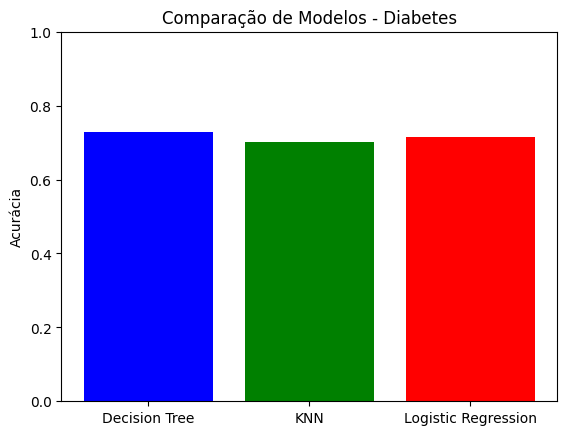

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import kagglehub
import os

path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

print("Arquivos disponíveis:", os.listdir(path))

df = pd.read_csv(f"{path}/diabetes.csv")

print("Primeiras linhas:\n", df.head())
print("\nInformações do dataset:\n")
print(df.info())
print("\nEstatísticas descritivas:\n", df.describe())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000, random_state=42)

dt.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_lr = lr.predict(X_test_scaled)

models = {"Decision Tree": y_pred_dt, "KNN": y_pred_knn, "Logistic Regression": y_pred_lr}

for name, y_pred in models.items():
    print(f"\n{name}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_lr)
]

plt.bar(["Decision Tree", "KNN", "Logistic Regression"], accuracies, color=['blue', 'green', 'red'])
plt.ylabel("Acurácia")
plt.title("Comparação de Modelos - Diabetes")
plt.ylim(0, 1)
plt.show()
